## Maiden Data Science Voyage on Kaggle with Titanic

Although I have been working in data science for almost a year now but unfortunately never worked on a Kaggle plateform. This is my first Kernel on Kaggle and like everyone else I will be starting with Titanic Survival Prediction as this is the "Hello World" of Kaggle plateform.
<br/><br/><br/>
I will try to solve the problem by following below steps:
<ol>
    <li>Importing the libraries and data</li>
    <li>Exploratory data analysis</li>
    <li>Data Cleaning, Feature Selection and Feature Engineering</li>
    <li>Modelling and Choosing the best Model</li>
    <li>Submitting our result</li>
</ol>

### Some facts about Titanic and it's sinking

Before we dive into solving the problem let's take a look at some of the facts about Titanic and it's sinking. As we all know Titanic was a british ship that sank in North Atlantic Ocean in 1912 during it's maiden voyage from Southampton to New York. It hit an iceberg around 11.40pm, 14th April 1912 and sank 2 hrs 40 mins later on 15th April 1912. Here are some other facts (maybe not necessary for solving this problem but good to know) that I stumbled upon while reading about this infamous incident before working on this dataset (Source: Wikipedia).
<ul>
    <li>There were estimated 2224 passengers including the crew on board, of which more than 1500 died making it modern history's deadliest marine disaster</li>
    <li>Titanic had total 9 decks, upper class decks were at the top. The lower decks were for lower class passengers and crew members hence the percentage of standard class and third class passengers who perished was significantly higher than first class passengers</li>
    <li>63% of passengers were perished in this accident. 39% of first class, 58% of second class and 76% of third class passengers were perished</li>
    <li>There were total 107 children travelling on the Titanic of which 50 were killed. Of 50 children who were killed, 1 was from the first class and 49 children were from lower class</li>
    <li>Of total 685 crew members, 76% perished</li>
    <li>While loading the lifeboats, "women and children first" protocol was followed resulting in 80% of male passengers perished. Of total female passengers, 25% were perished</li>
    <li>The ship was under occupied as it could carry total 3547 people (including crew) but there were only 2223 people aboard otherwise the tragedy could have been much worse </li>
    <li>The ship received 6 warnings of icebergs before the collision</li>
    <li>Titanic carried only a total of 20 lifeboats, four of which were collapsible and proved hard to launch during the sinking. Lifeboats were only enough for 1,178 people - about half the number on board, and one third of her total capacity.</li>
    <li>The temperature of the sea water in the area where Titanic sank was -2°C</li>
    <li>The wreck of the Titanic lays at the depth of 12600 feet</li>
    <li>Titanic's owner J. P. Morgan was scheduled to travel on the maiden voyage but cancelled at the last minute.       </li>
    
</ul>

## 1.  Importing the Libraries and data

In [1]:
#Libraries for data processing and analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Library to access directory related functions
import os

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Checking files in the directory
print(os.listdir("../input"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [3]:
data_train = pd.read_csv("../input/train.csv")
data_test = pd.read_csv("../input/test.csv")

## 2. Exploratory Data Analysis

In [4]:
#Shape of dataset
print("Shape of train set: ",data_train.shape)
print("Shape of test set: ",data_test.shape)

Shape of train set:  (891, 12)
Shape of test set:  (418, 11)


In [5]:
#Columns or features in the dataset
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here is the Data Dictionary or definition of variables.

<ul>
    <li><b>PassengerId</b> : It is an unique id for each passenger on the ship</li>
    <li><b>Survived</b> : This is the target feature or dependent variable which we have to predict. For this variable in the train set the value 1 indicates the passenger survived. This variable will not be available in the test set because there we'll predict it</i>
    <li><b>Pclass</b> : This variable describes the class of the passengers. Values 1,2 and 3 indicate First, Second and Third class respectively</i>
    <li><b>Name</b> : Name of the passenger</li>
    <li><b>Sex</b> : Sex of the passenger </li>
    <li><b>Age</b> : Age of the passenger </li>
    <li><b>SibSp</b> : Number of siblings and spouses traveling with the passenger</li>
    <li><b>Parch</b> : Number of parents and children traveling with the passenger</li>
    <li><b>Ticket</b> : The ticket number</li>
    <li><b>Fare</b> : Ticket Fare</li>
    <li><b>Cabin</b> : Cabin number of the passenger</li>
    <li><b>Embarked</b> : Port of Embarkation of the passenger. The three possible values are C = Cherbourg, Q = Queenstown, S = Southampton</li>
</ul>

In [6]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The column <b>Survived</b> is the target feature here which we've to predict. The value 1 in this variable states the fact that passenger survived.

In [7]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's describe the numeric variables of train set.

In [8]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As you can see Age column has 177 missing values. So we'll impute those values little later. Let see what other variables have missing values.

In [9]:
Missing_Val = pd.concat([data_train.isnull().sum(),data_test.isnull().sum()],axis=1,keys=['Train DataSet', 'Test DataSet'])

In [10]:
Missing_Val[Missing_Val.sum(axis=1)>0]

,Train DataSet,Test DataSet
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0


Since Cabin column seems to have lot of missing values (close to 80%) hence will drop this column for now and if needed we'll see later if imputing it and adding it back adds some value to our model. For now we will just do some exploratory analysis on train set after imputing Age and Embarked columns.

In [11]:
#Let see which is the most frequent port of embarkation in the data.
data_train.groupby(["Embarked"]).count()["PassengerId"]

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [12]:
#Imputing Age and Embarked columns and Removing Cabin column. Will impute Age with median Age and Embarked column with S (most frequent). 
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())
data_train["Embarked"]=data_train["Embarked"].fillna("S")
#Dropping Cabin column
data_train.drop(columns=["Cabin"],axis=1,inplace=True)
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Let us visualize the data.

Text(0.5, 1.0, 'Pclass vs. Survived')

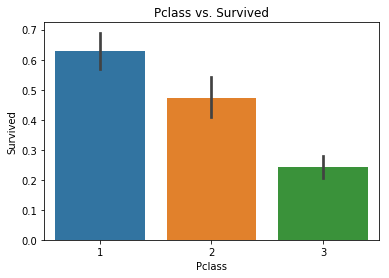

In [13]:
#Let's plot a bar graph of Survival by class

sns.barplot(x="Pclass",y="Survived",data=data_train).set_title("Pclass vs. Survived")


Text(0.5, 1.0, 'Sex vs. Survived')

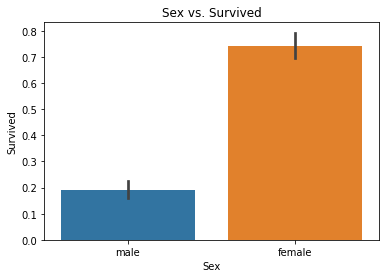

In [14]:
#Let see if there is some relationship between people who survived and sex

sns.barplot(x="Sex",y="Survived",data=data_train).set_title("Sex vs. Survived")

Clearly the female percentage of survived is significantly high.

Text(0.5, 1.0, 'Embarked vs. Survived')

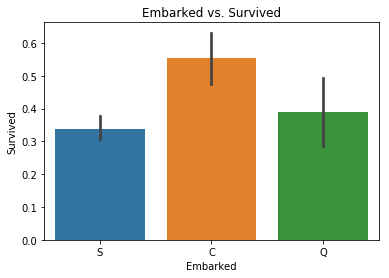

In [15]:
#Let see if point of embarkation has any relation with Survival
sns.barplot(x="Embarked",y="Survived",data=data_train).set_title("Embarked vs. Survived")

% of Passengers who survived and embarked on their journey from Cherbourg are very high compared to other ports.

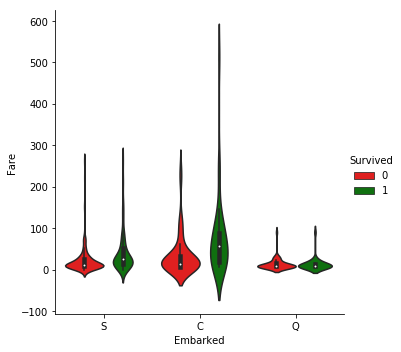

In [16]:
sns.catplot(x="Embarked",y="Fare",hue="Survived",data=data_train,kind="violin",height=5,aspect=1,legend=True,palette={0:"r",1:"g"})

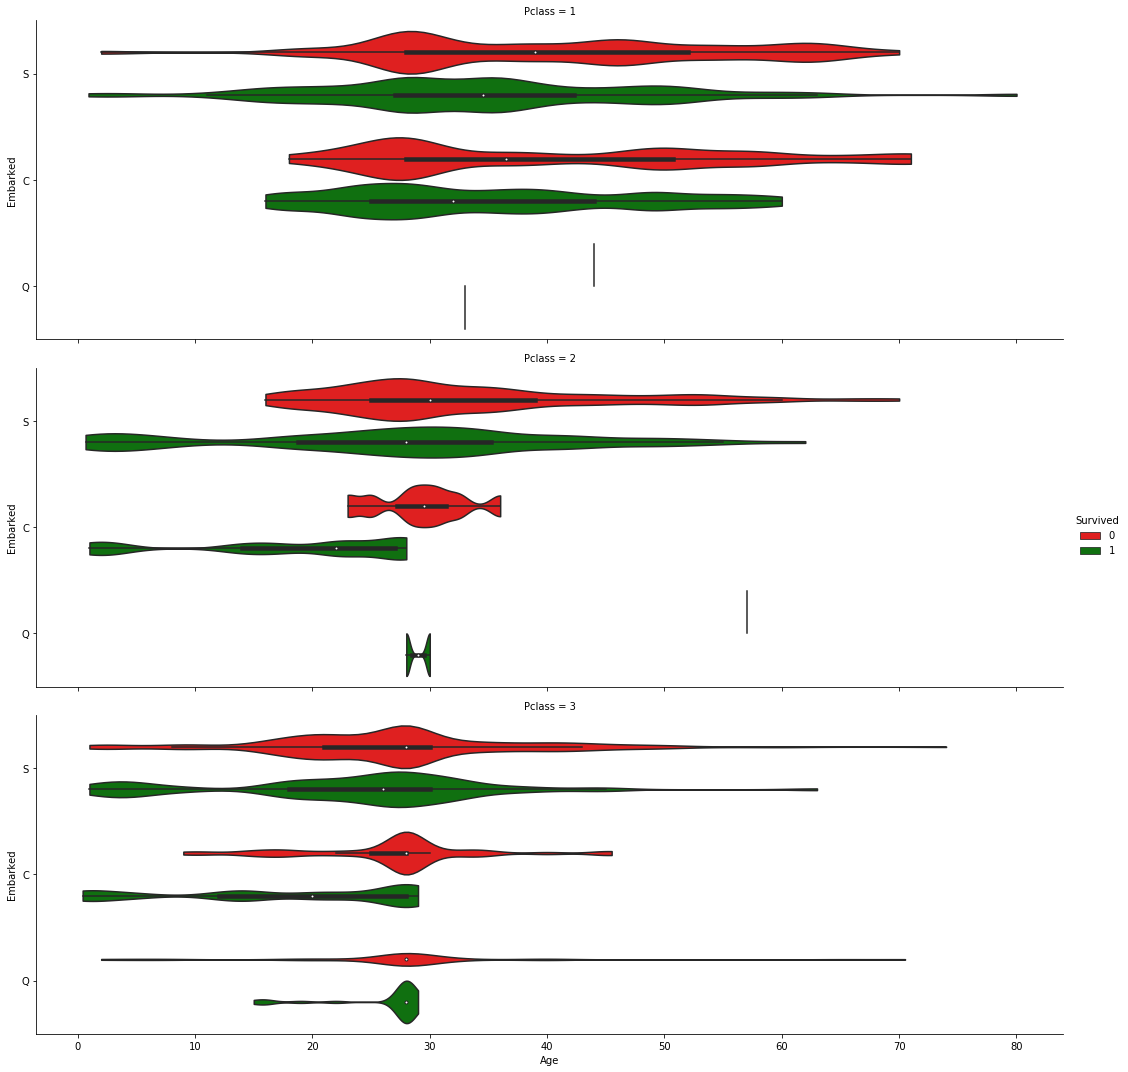

In [17]:
#Let's look at a relation between, Pclass, Embarkation point, Age and Survived.
sns.catplot(x="Age", y="Embarked",hue="Survived", row="Pclass",data=data_train,orient="h", height=5, aspect=3, palette={0:"r",1:"g"},kind="violin", dodge=True, cut=0, bw=.2)

* Nobody or close to negligible passengers in first and second class embarked from Queenstown. The majority of people who embarked from Queenstown were third class passengers
* The people who embarked on Titanic from Queenstown and survived were within age group of 15-30
* Out of all the kids aboard most of them were in either second or third class
* We can also see that most of the kids and teens (age group 0 - 18) who perished were in third class
* Most of the senior citizens aboard were in first class

Text(0.5, 1.0, 'Number of Siblings and Spouses vs. Survived')

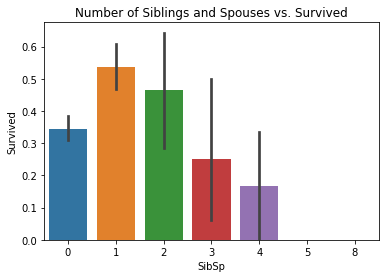

In [18]:
#Let see if point of Sibsp has any relation with Survival
sns.barplot(x="SibSp",y="Survived",data=data_train).set_title("Number of Siblings and Spouses vs. Survived")

The Graph shows that people with more siblings or spouses were less likely to survive (Maybe because most of them were in lower class decks). However passengers who did not have any siblings or spouse were also less likely to survive which is surprising.

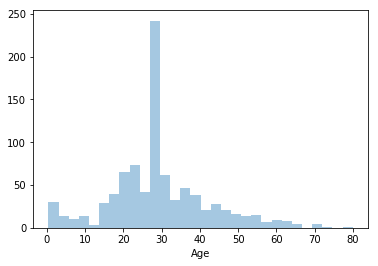

In [19]:
#Checking which age group was high in numbers
sns.distplot(a=data_train["Age"],kde=False)

Looks like the percentage of people aboard within age group of 25-30 was high

In [20]:
#Let's make bin of age groups and then see it's relationship with Survival
bins = [-1,12, 17, 24, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
data_train['AgeGroup'] = pd.cut(data_train["Age"], bins, labels = labels)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


Text(0.5, 1.0, 'Age vs. Survived')

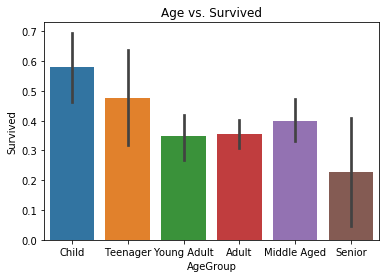

In [21]:
sns.barplot(x="AgeGroup",y="Survived",data=data_train).set_title("Age vs. Survived")

Children, Teenager (maybe because of "women and children" first protocol) and Middle Aged survived most among all the passengers.

In [22]:
#Let's make bin of age groups and then see it's relationship with Survival
bins = [0,50, 100, 200, np.inf]
labels = ['Basic Economy', 'Regular Economy', 'Luxury', 'Super Luxury']
data_train['Fare_Bin'] = pd.cut(data_train["Fare"], bins, labels = labels)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,Basic Economy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle Aged,Regular Economy
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,Basic Economy
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,Regular Economy
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,Basic Economy


Text(0.5, 1.0, 'Fare vs. Survived')

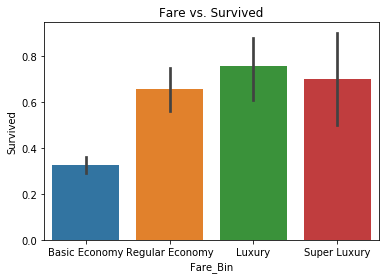

In [23]:
sns.barplot(x="Fare_Bin",y="Survived",data=data_train).set_title("Fare vs. Survived")

The results of Fare vs. Survived graph resonates with PClass Vs. Survived. So the number of people who bought expensive tickets survived outnumbered people who bought economy tickets.

## 3. Data Cleaning, Feature Selection and Feature Engineering

We will again load the data and impute both train and test set wherever data is missing.

In [24]:
data_train = pd.read_csv("../input/train.csv")
data_test = pd.read_csv("../input/test.csv")

#Storing target variable in a temporary variable for later use
Response_Var = data_train.Survived

data_train.drop(["Survived"],axis=1,inplace=True)
data_combined = data_train.append(data_test)
data_combined.reset_index(inplace=True)
data_combined.drop(["Ticket","Cabin"],axis=1,inplace=True)

In [25]:
data_combined.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [26]:
data_combined.shape

(1309, 10)

<b>Processing Name column and extracting Title</b>

Let us extract title from Name column which we will use later for our analysis. Title is nothing but the salutation or social status salutation used for a particular person e.g. Mr., Mrs., Dr. etc

In [27]:
title = set()
for i in data_combined["Name"]:
    title.add(i.split(",")[1].split(".")[0].strip())
print(title)

{'Ms', 'Mrs', 'the Countess', 'Major', 'Jonkheer', 'Dr', 'Col', 'Don', 'Lady', 'Dona', 'Mlle', 'Mr', 'Mme', 'Miss', 'Sir', 'Rev', 'Capt', 'Master'}


In [28]:
# Let's make a dictionary to map all the titles with categories of titles

title_dict = {
    "Jonkheer" : "Royalty",
    "Dr" : "Officer",
    "Mme" : "Mrs",
    "Major" : "Officer",
    "Rev" : "Officer",
    "Mr" : "Mr",
    "Dona" : "Royalty",
    "Ms" : "Mrs",
    "Mrs" : "Mrs",
    "Mlle" : "Miss",
    "Master" : "Master",
    "Don" : "Royalty",
    "Sir" : "Royalty",
    "the Countess" : "Royalty",
    "Lady" : "Royalty",
    "Col" : "Officer",
    "Miss" : "Miss",
    "Capt" : "Officer"
}

#Creating a new column Title
data_combined["Title"] = data_combined["Name"].map(lambda name:name.split(',')[1].split('.')[0].strip())

#Mapping Title with title categories
data_combined["Title"] = data_combined["Title"].map(title_dict)
data_combined.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [29]:
#To check if there is any row where Title has not been filled correctly.
data_combined["Title"].isnull().sum()

0

In [30]:
#Now we can drop Name column as we've extracted Title and Name column won't add any value to our model anymore.
data_combined.drop(["Name"],axis=1,inplace=True)
data_combined.head()

,index,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,1,3,male,22.0,1,0,7.2500,S,Mr
1,1,2,1,female,38.0,1,0,71.2833,C,Mrs
2,2,3,3,female,26.0,0,0,7.9250,S,Miss
3,3,4,1,female,35.0,1,0,53.1000,S,Mrs
4,4,5,3,male,35.0,0,0,8.0500,S,Mr


In [31]:
#Calculating median age based on class, sex, title for training data only. Then we can use this dataframe to impute our Age column in both Train and Test data set
train_grp = data_combined.iloc[:891].groupby(["Pclass","Sex","Title"])
train_grp_median = train_grp.median()
train_grp_median = train_grp_median.reset_index()[["Pclass","Sex","Title","Age"]]
train_grp_median

,Pclass,Sex,Title,Age
0,1,female,Miss,30.0
1,1,female,Mrs,40.0
2,1,female,Officer,49.0
3,1,female,Royalty,40.5
4,1,male,Master,4.0
5,1,male,Mr,40.0
6,1,male,Officer,51.0
7,1,male,Royalty,40.0
8,2,female,Miss,24.0
9,2,female,Mrs,31.5


In [32]:
#Let's impute Age column in our combined data set
for i in range(len(data_combined["Age"])):
    if pd.isnull(data_combined["Age"].iloc[i]):
        condition = (train_grp_median["Sex"]==data_combined["Sex"].iloc[i]) & (train_grp_median["Title"]==data_combined["Title"].iloc[i]) & (train_grp_median["Pclass"]==data_combined["Pclass"].iloc[i])
        data_combined["Age"].iloc[i] = train_grp_median[condition]["Age"].iloc[0]

<b>Imputing Fare</b><br/><br/>Let's impute missing value with the mean of training set

In [33]:
data_combined["Fare"].fillna(data_combined[:891]["Fare"].mean(), inplace=True)

<b>Imputing Emarbked</b><br/><br/>We will impute the Embarked column with the most frequest port i.e. mode

In [34]:
data_combined["Embarked"].fillna(data_combined[:891]["Embarked"].mode()[0],inplace=True)

In [35]:
#Let's check if there are variables with missing values
data_combined.isnull().sum()

index          0
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

#### Categorical Encoding

Now it's time to encode categorical variables so that they can be used in modelling.

In [36]:
#Let's see which all variables we need to encode
data_combined.dtypes

index            int64
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object

So we've to encode Pclass, Sex, Embarked and Title

<b>Encoding Pclass</b>

In [37]:
# We will use pd.get_dummies() to encode

Pclass_dum = pd.get_dummies(data=data_combined["Pclass"],prefix="Pclass",prefix_sep="_")
#Adding dummy variables into main dataset
data_combined = pd.concat([data_combined,Pclass_dum],axis=1)
#Dropping the original Pclass variable since it is not required now
data_combined.drop(labels="Pclass",axis=1,inplace=True)
data_combined.head()

,index,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
0,0,1,male,22.0,1,0,7.2500,S,Mr,0,0,1
1,1,2,female,38.0,1,0,71.2833,C,Mrs,1,0,0
2,2,3,female,26.0,0,0,7.9250,S,Miss,0,0,1
3,3,4,female,35.0,1,0,53.1000,S,Mrs,1,0,0
4,4,5,male,35.0,0,0,8.0500,S,Mr,0,0,1


<b>Encoding Sex</b>

In [38]:
#Since Sex has only two categories so we can just convert them to 0 and 1 so no need to create dummies
data_combined["Sex"] = data_combined["Sex"].map({"male":1,"female":0})
data_combined.head()

,index,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
0,0,1,1,22.0,1,0,7.2500,S,Mr,0,0,1
1,1,2,0,38.0,1,0,71.2833,C,Mrs,1,0,0
2,2,3,0,26.0,0,0,7.9250,S,Miss,0,0,1
3,3,4,0,35.0,1,0,53.1000,S,Mrs,1,0,0
4,4,5,1,35.0,0,0,8.0500,S,Mr,0,0,1


<b>Encoding Embarked</b>

In [39]:
#Creating dummies for Embarked column
Embarked_dum = pd.get_dummies(data=data_combined["Embarked"],prefix="Embarked",prefix_sep="_")
data_combined = pd.concat([data_combined,Embarked_dum],axis=1)
data_combined.drop(labels="Embarked",axis=1,inplace=True)
data_combined.head()

,index,PassengerId,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,22.0,1,0,7.2500,Mr,0,0,1,0,0,1
1,1,2,0,38.0,1,0,71.2833,Mrs,1,0,0,1,0,0
2,2,3,0,26.0,0,0,7.9250,Miss,0,0,1,0,0,1
3,3,4,0,35.0,1,0,53.1000,Mrs,1,0,0,0,0,1
4,4,5,1,35.0,0,0,8.0500,Mr,0,0,1,0,0,1


<b>Encoding Title</b>

In [40]:
#Creating dummies for title column
Title_dum = pd.get_dummies(data=data_combined["Title"],prefix="Title",prefix_sep="_")
data_combined = pd.concat([data_combined,Title_dum],axis=1)
data_combined.drop(labels="Title",axis=1,inplace=True)
data_combined.head()

,index,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,1,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,1,2,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,1,0,0
2,2,3,0,26.0,0,0,7.9250,0,0,1,0,0,1,0,1,0,0,0,0
3,3,4,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,1,0,0
4,4,5,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0


In [41]:
data_combined.reset_index()
data_combined.drop(labels="index",axis=1,inplace=True)

In [42]:
data_combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,2,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1,0,0,1,0,1,0,0,0,0
3,4,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,1,0,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0


<b>Feature Importance and Selection</b>

In [43]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
train = data_combined[:891]
test = data_combined[891:]


In [44]:
# fit an Extra Trees model to the data
Feature_Imp_model = ExtraTreesClassifier()

In [45]:
#We had already created a variable called Response_Var as target 
Feature_Imp_model.fit(train, Response_Var)
# display the relative importance of each attribute
print(Feature_Imp_model.feature_importances_)

[0.17301786 0.10005938 0.13999985 0.04356278 0.02276913 0.15806596
 0.0394338  0.0201541  0.04853899 0.00673229 0.00738176 0.016295
 0.01409756 0.03623627 0.12522136 0.04342082 0.00402185 0.00099126]


In [46]:
Importance_Df = pd.DataFrame()
Importance_Df["Variables"] = train.columns
Importance_Df["Importance"] = Feature_Imp_model.feature_importances_
Importance_Df.sort_values(by=['Importance'],ascending=True,inplace=True)
Importance_Df.set_index("Variables", inplace=True)

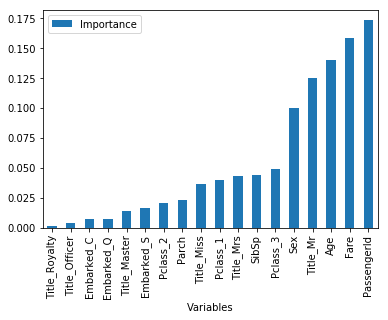

In [47]:
Importance_Df.plot(kind="bar")

Looks like except Title_Royalty and Title_Officer, all other variables have good importance value. For now we'll keep all the variables and if our model accuracy is not good then we'll remove these two variables and again run our model.

## 4. Modelling

I am going to use different techniques and see which one performs good

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
predictors = train.drop(["PassengerId"],axis=1)
target = Response_Var
x_train,x_validation,y_train,y_validation = train_test_split(predictors,target,test_size=0.25,random_state=123)

In [50]:
Logistic_Regression = LogisticRegression()
K_Nearest_Neighbor = KNeighborsClassifier()
Decision_Tree = DecisionTreeClassifier()
Support_Vector = SVC()
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()
model_lst = [Logistic_Regression,K_Nearest_Neighbor,Decision_Tree,Support_Vector,Random_Forest_Classifier,Gradient_Boosting_Classifier]
    

In [51]:
#Running models and validating
for model in model_lst:
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_validation)
    print("Accuracy of {0} model is {1}".format(str(model.__class__).split(".")[3].split("'")[0],accuracy_score(y_validation,y_predicted)))

Accuracy of LogisticRegression model is 0.8430493273542601
Accuracy of KNeighborsClassifier model is 0.7130044843049327
Accuracy of DecisionTreeClassifier model is 0.7713004484304933
Accuracy of SVC model is 0.7219730941704036
Accuracy of RandomForestClassifier model is 0.7982062780269058
Accuracy of GradientBoostingClassifier model is 0.8565022421524664


So out of all the models GradientBoostingClassifier performed well so I will use this only for prediction of test data.

## 5. Submitting Result

Let's create submission file and submit for evaluation :)

In [52]:
PassengerId = test["PassengerId"]
prediction = Gradient_Boosting_Classifier.predict(test.drop("PassengerId",axis=1))

In [53]:
output_df = pd.DataFrame({"PassengerId" : PassengerId, "Survived" : prediction})
output_df.to_csv("Submission.csv",index=False)


This is my first submission and I know there are areas of improvement. I will keep working on it and improving it. So any constructive feedback is welcome.

<br/><br/><b>Sources</b><br/>Here are the sources that I referred, followed and found useful for my first competition on Kaggle.<br/><br/>
[How to score 0.8134 in Titanic Kaggle Challenge](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)<br/>
[Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)